# Vessel Classification

#### Oct 25, 2020
#### Joseph Sepich

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dir_path = './data/AIS/'
all_files = os.listdir(dir_path)
all_files = [dir_path + f for f in all_files]

other_dir = './data/AIS_sub/'
first = True
for f in all_files:
    temp = pd.read_csv(f)
    temp = temp[temp.VesselType.isin([37,51,35,30])]
    if first:
        temp.to_csv(other_dir + 'binary_set.csv',index=False)
        first = False
    else:
        temp.to_csv(other_dir + 'binary_set.csv',index=False,header=False,mode='a')
del temp

In [3]:
ais = pd.read_csv(other_dir + 'binary_set.csv')
ais.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass
0,367773000,2019-01-03T00:00:00,47.63336,-122.32919,0.0,32.1,511.0,OCEAN FRESH,IMO8836405,WDC4996,30.0,0.0,60.0,13.0,NaN,71.0,B
1,367488250,2019-01-03T00:00:00,48.10520,-122.77758,0.0,49.8,511.0,SUNNYVALE,IMO8851455,WDF7798,30.0,0.0,23.0,7.0,NaN,30.0,B
2,367378410,2019-01-03T00:00:00,32.78136,-117.26479,2.1,41.7,511.0,CACHALOT,IMO8402175,WDE6295,30.0,NaN,23.0,7.0,2.9,NaN,B
3,367326360,2019-01-03T00:00:00,47.65729,-122.38230,0.0,-182.0,511.0,PACIFIC CHALLENGER,IMO7043221,WDE2519,30.0,0.0,24.0,7.0,NaN,NaN,B
4,338173231,2019-01-03T00:00:00,30.22528,-89.78938,0.0,107.7,511.0,VELVET ELVIS,NaN,NaN,37.0,NaN,12.0,NaN,NaN,NaN,B


In [4]:
ais.shape

(7881571, 17)

# EDA

In [5]:
# unique vessel names
ais.VesselName.nunique()

5867

array([[<AxesSubplot:title={'center':'SOG'}>]], dtype=object)

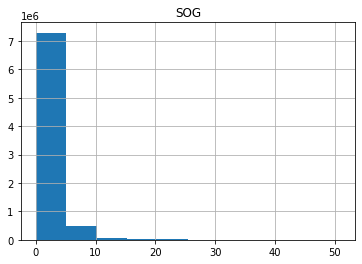

In [6]:
ais[ais.SOG >= 0].hist('SOG')

array([[<AxesSubplot:title={'center':'SOG'}>]], dtype=object)

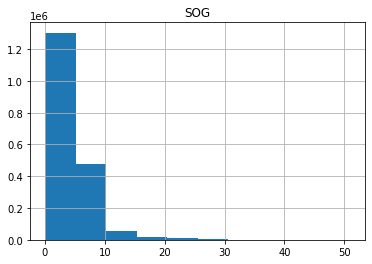

In [7]:
ais[ais.SOG > 0].hist('SOG')

Try a heatmap of reports.

In [8]:
count_p = len(ais[ais.VesselType == 37])
count_s = len(ais[ais.VesselType == 51])
count_mil = len(ais[ais.VesselType == 35])
count_fish = len(ais[ais.VesselType == 30])
count_tot = count_mil + count_p + count_s + count_fish
print('Percentage 37: ', count_p / count_tot)
print('Percentage 51: ', count_s / count_tot)
print('Percentage 35: ', count_mil / count_tot)
print('Percentage 30: ', count_fish / count_tot)

Percentage 37:  0.6647537654612259
Percentage 51:  0.003259121817211315
Percentage 35:  0.002139040554224532
Percentage 30:  0.3298480721673382


# Base Models

## Decision Tree

In [18]:
# import
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split

In [28]:
features = ['LAT','LON','SOG','Heading']
X_train = ais[features]
Y_train = ais['VesselType'].astype(str).tolist()
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=123)
dt_model = DecisionTreeClassifier(max_depth=3,random_state=123)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

[Text(167.4, 190.26, 'X[1] <= -123.704\ngini = 0.449\nsamples = 5517099\nvalue = [1820026, 11828, 3667244, 18001]'),
 Text(83.7, 135.9, 'X[1] <= -123.885\ngini = 0.098\nsamples = 753005\nvalue = [714259, 2906, 35739, 101]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 60.753\ngini = 0.087\nsamples = 730323\nvalue = [697022, 2906, 30362, 33]'),
 Text(20.925, 27.180000000000007, 'gini = 0.086\nsamples = 729611\nvalue = [697022, 2906, 29650, 33]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.0\nsamples = 712\nvalue = [0, 0, 712, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 48.374\ngini = 0.366\nsamples = 22682\nvalue = [17237, 0, 5377, 68]'),
 Text(104.625, 27.180000000000007, 'gini = 0.18\nsamples = 17946\nvalue = [16157, 0, 1789, 0]'),
 Text(146.475, 27.180000000000007, 'gini = 0.374\nsamples = 4736\nvalue = [1080, 0, 3588, 68]'),
 Text(251.10000000000002, 135.9, 'X[1] <= -76.467\ngini = 0.365\nsamples = 4764094\nvalue = [1105767, 8922, 3631505, 17900]'),
 Text(2

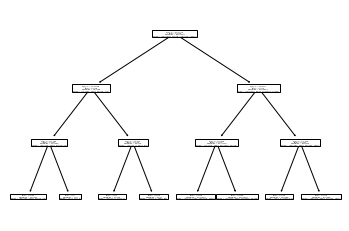

In [31]:
plot_tree(dt_model)

In [32]:
print('Accuracy of decision tree classifier on train set: {:.2f}'.format(dt_model.score(X_train, Y_train)))
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dt_model.score(X_test, Y_test)))

Accuracy of decision tree classifier on train set: 0.83
Accuracy of decision tree classifier on test set: 0.83


In [33]:
from sklearn.metrics import confusion_matrix
Y_pred = dt_model.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[ 458784       0  320911       0]
 [   2965       0    2066       0]
 [  59145       0 1512915       0]
 [    723       0    6963       0]]


In [34]:
features = ['SOG','Heading']
X_train = ais[features]
Y_train = ais['VesselType'].astype(str).tolist()
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=123)
dt_model = DecisionTreeClassifier(max_depth=3,random_state=123)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

[Text(167.4, 190.26, 'X[0] <= 1.35\ngini = 0.449\nsamples = 5517099\nvalue = [1820026, 11828, 3667244, 18001]'),
 Text(83.7, 135.9, 'X[1] <= 434.5\ngini = 0.414\nsamples = 4832982\nvalue = [1371462, 11327, 3435300, 14893]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 0.05\ngini = 0.48\nsamples = 783394\nvalue = [295393, 2986, 481532, 3483]'),
 Text(20.925, 27.180000000000007, 'gini = 0.49\nsamples = 689779\nvalue = [274048, 2872, 409490, 3369]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.356\nsamples = 93615\nvalue = [21345, 114, 72042, 114]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 0.45\ngini = 0.397\nsamples = 4049588\nvalue = [1076069, 8341, 2953768, 11410]'),
 Text(104.625, 27.180000000000007, 'gini = 0.396\nsamples = 3971339\nvalue = [1047825, 8279, 2904059, 11176]'),
 Text(146.475, 27.180000000000007, 'gini = 0.466\nsamples = 78249\nvalue = [28244, 62, 49709, 234]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 10.55\ngini = 0.455\nsamples = 684117\nvalue 

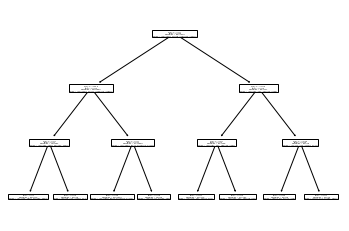

In [35]:
plot_tree(dt_model)

In [36]:
print('Accuracy of decision tree classifier on train set: {:.2f}'.format(dt_model.score(X_train, Y_train)))
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dt_model.score(X_test, Y_test)))

Accuracy of decision tree classifier on train set: 0.71
Accuracy of decision tree classifier on test set: 0.71


In [39]:
from sklearn.metrics import confusion_matrix
Y_pred = dt_model.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[ 188158       0  591537       0]
 [    128       0    4903       0]
 [  79320       0 1492740       0]
 [    536       0    7150       0]]


## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [52]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)
coefficients

,0,0,1,2,3
0,SOG,0.396449,-1.130086,0.277682,0.455956
1,Heading,0.000426,-0.000987,0.001415,-0.000854


Implies that heading by itself is not much of an indicator, whereas speed does have some correlation with each vessel type.

In [45]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, Y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of decision tree classifier on train set: 0.67
Accuracy of decision tree classifier on test set: 0.67


In [53]:
from sklearn.metrics import confusion_matrix
Y_pred = logreg.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[  69387       0  710308       0]
 [    110       0    4921       0]
 [  48329      16 1523715       0]
 [    868       0    6818       0]]


In [54]:
features = ['LAT','LON','SOG','Heading']
X_train = ais[features]
Y_train = ais['VesselType'].astype(str).tolist()
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=123)
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [55]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)
coefficients

,0,0,1,2,3
0,LAT,-0.060541,0.057572,-0.151390,0.154360
1,LON,-0.052108,0.031976,-0.065084,0.085216
2,SOG,0.025176,-0.034039,-0.082973,0.091836
3,Heading,0.001167,-0.003886,0.004925,-0.002207


From this I would interpret that the way we modeled this, position is easier/more useful in determining vessel type.

In [56]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, Y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on train set: 0.75
Accuracy of logistic regression classifier on test set: 0.75


In [57]:
from sklearn.metrics import confusion_matrix
Y_pred = logreg.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[ 306201       0  471916    1578]
 [   1418       0    3613       0]
 [ 113289       0 1458770       1]
 [   2498       0    5170      18]]


## Boosted

In [58]:
from sklearn.ensemble import AdaBoostClassifier

In [59]:
features = ['LAT','LON','SOG','Heading']
X_train = ais[features]
Y_train = ais['VesselType'].astype(str).tolist()
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=123)
ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)

AdaBoostClassifier()

In [60]:
print('Accuracy of AdaBoost classifier on train set: {:.2f}'.format(ada.score(X_train, Y_train)))
print('Accuracy of AdaBoost classifier on test set: {:.2f}'.format(ada.score(X_test, Y_test)))

Accuracy of AdaBoost classifier on train set: 0.81
Accuracy of AdaBoost classifier on test set: 0.81


In [61]:
from sklearn.metrics import confusion_matrix
Y_pred = ada.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[ 522505       2  257160      28]
 [   1890       0    3132       9]
 [ 173956       0 1397786     318]
 [    953       0    6569     164]]


## Voyage View Classification

In [10]:
dir_path = './data/voyage_agg/'
all_files = os.listdir(dir_path)
all_files = [dir_path + f for f in all_files]

other_dir = './data/voyage_agg_sub/'
first = True
for f in all_files:
    temp = pd.read_csv(f)
    temp = temp[temp.VesselType.isin([37,51,35,30])]
    if first:
        temp.to_csv(other_dir + 'binary_set.csv',index=False)
        first = False
    else:
        temp.to_csv(other_dir + 'binary_set.csv',index=False,header=False,mode='a')
del temp

In [11]:
ais = pd.read_csv(other_dir + 'binary_set.csv')
ais.head()

,voyage_id,VesselName,MMSI,VesselType,LAT,LON,SOG,Heading,acceleration,bearing_rate
0,12#1546646455000,CLETUS,12,37.0,27.332266,-82.585133,0.06875,511.0,0.000003,0.0
1,123456789#1546646474000,ODYSSEY,123456789,37.0,29.693399,-86.387592,0.00000,511.0,-0.572892,0.0
2,123456789#1546649896000,ODYSSEY,123456789,37.0,29.005617,-85.071433,0.00000,511.0,-11.399788,0.0
3,123456789#1546650794000,ODYSSEY,123456789,37.0,29.005613,-85.071427,0.00000,511.0,-11.293279,0.0
4,123456789#1546651334000,ODYSSEY,123456789,37.0,29.005613,-85.071423,0.00000,511.0,-11.676185,0.0


In [12]:
ais.shape

(36327, 10)

In [13]:
ais.VesselName.nunique()

5566

array([[<AxesSubplot:title={'center':'SOG'}>]], dtype=object)

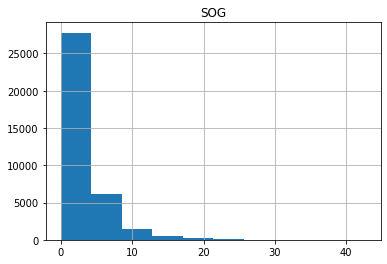

In [14]:
ais[ais.SOG >= 0].hist('SOG')

In [15]:
count_p = len(ais[ais.VesselType == 37])
count_s = len(ais[ais.VesselType == 51])
count_mil = len(ais[ais.VesselType == 35])
count_fish = len(ais[ais.VesselType == 30])
count_tot = count_mil + count_p + count_s + count_fish
print('Percentage 37: ', count_p / count_tot)
print('Percentage 51: ', count_s / count_tot)
print('Percentage 35: ', count_mil / count_tot)
print('Percentage 30: ', count_fish / count_tot)

Percentage 37:  0.6618493131830319
Percentage 51:  0.007432488231893633
Percentage 35:  0.0028628843559886587
Percentage 30:  0.3278553142290858


## Voyage Models

### Decision Tree

### Logistic Regression